<a href="https://colab.research.google.com/github/iranildo/Gradient-Boosting-Method--ML/blob/main/GBM_Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting Method

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Determinar se um cliente realizou a compra através de uma propaganda utilizando o método de Gradiente Boosting Method (GBM)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dados = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Coluna User ID não é necessária para o modelo pois é apenas um identificador do usuário

In [5]:
dados.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
dados = dados.drop('User ID',axis=1)

In [7]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Verificando quantidade de usuários de cada sexo

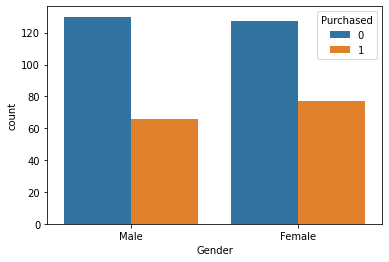

In [8]:
sns.countplot(data=dados,x='Gender',hue='Purchased')

Verificamos que existe um equilíbrio entre homens e mulheres

Vamos verificar a distribuição de idades

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


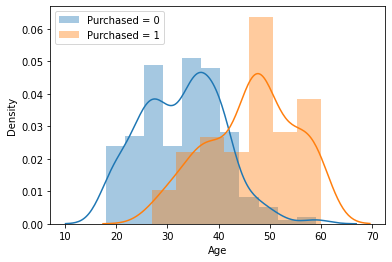

In [9]:
sns.distplot(dados[dados['Purchased']==0]['Age'],label='Purchased = 0')
sns.distplot(dados[dados['Purchased']==1]['Age'],label='Purchased = 1')
plt.legend()

Verificamos que os usuários que realizaram a compra estão na faixa etária entre 40 e 60 anos

Vamos verificar a distribuição de salários

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


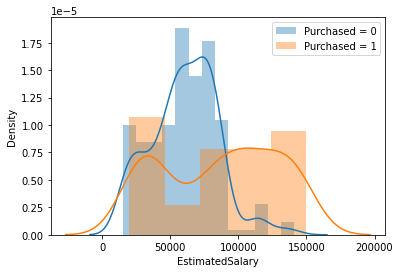

In [10]:
sns.distplot(dados[dados['Purchased']==0]['EstimatedSalary'],label='Purchased = 0')
sns.distplot(dados[dados['Purchased']==1]['EstimatedSalary'],label='Purchased = 1')
plt.legend()

Normalmente os usuário que não efetuam a compra tem um salário estimado inferior a 100k. Já os que efeturaram a compra tem uma faixa ampla de salários

Verificando a quantidade de usuários que efetuaram ou não a compra

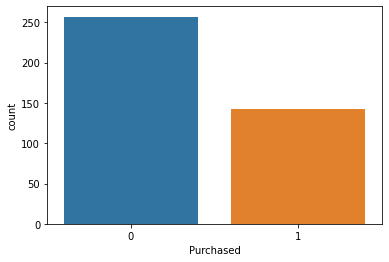

In [11]:
sns.countplot(x='Purchased',data=dados)

Verificamos que aproximadamente 3/8 dos usuários efetuaram a compra

Convertendo a variável categórica Gender para numérica

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
enconder = LabelEncoder()

In [14]:
dados['Gender'] = enconder.fit_transform(dados['Gender'])

In [15]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Normalizando as colunas Age e Estimated Salary

In [16]:
cols = ['Age','EstimatedSalary']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
dados[cols] = sc.fit_transform(dados[cols])

In [20]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


Determinando as variáveis X e Y

In [21]:
X = dados.drop('Purchased',axis=1).values
Y = dados['Purchased'].values

Separando em amostra de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo GBM

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
modelo = GradientBoostingClassifier()

In [26]:
modelo.fit(X_treino,Y_treino)

GradientBoostingClassifier()

Acurácia na amostra de treino

In [27]:
modelo.score(X_treino,Y_treino)

0.98

Realizando previsões com a amostra de teste e determinando acurácia

In [28]:
Y_previsto = modelo.predict(X_teste)

In [29]:
modelo.score(X_teste,Y_teste)

0.91

Criando matriz de confusão

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [32]:
cm

array([[64,  4],
       [ 5, 27]])

Verificamos que sem mesmo ter refinado os parâmetros de entrada do modelo GBM, o mesmo apresentou uma boa acurário nas amostras de treino e teste

# Gerando imagem da árvore

In [33]:
from sklearn.tree import plot_tree

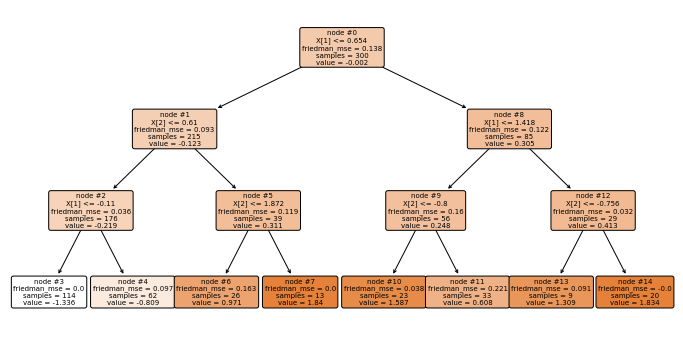

In [34]:
plt.figure(figsize=(12,6))
tree = modelo.estimators_[4, 0]
plot_tree(tree,filled=True,node_ids=True,rounded=True);